<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2b:-Bayesian-inference-(Python)" data-toc-modified-id="Chapter-2b:-Bayesian-inference-(Python)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2b: Bayesian inference (Python)</a></span><ul class="toc-item"><li><span><a href="#1.-Problem-statement" data-toc-modified-id="1.-Problem-statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Problem statement</a></span></li><li><span><a href="#2.-Bayesian-inference" data-toc-modified-id="2.-Bayesian-inference-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Bayesian inference</a></span><ul class="toc-item"><li><span><a href="#2.1.-Prior-distribution" data-toc-modified-id="2.1.-Prior-distribution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>2.1. Prior distribution</a></span></li><li><span><a href="#2.2.-Observations" data-toc-modified-id="2.2.-Observations-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>2.2. Observations</a></span></li><li><span><a href="#2.3.-Posterior-distribution" data-toc-modified-id="2.3.-Posterior-distribution-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>2.3. Posterior distribution</a></span></li></ul></li></ul></li></ul></div>

# Chapter 2b: Bayesian inference (Python)

In this notebook, we will do our first Bayesian inference model consisting in flipping a coin to determine if it is fair or not (i.e. probability of heads 0.5 or not). In the companion notebook '_Chapter 2b: Bayesian inference (R)_', we will make an application in Seismology.

Both examples will be based on the same Bayesian inference method. Only the data and the types of probability distributions will differ:
* **Beta distribution** & **Binomial distribution**: this notebook
* Gaussian distribution: the next notebook

First, we must import the necessary Python libraries for our coin flipping exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

## 1. Problem statement

We are observing whether a coin flip results in "heads" or "tails". We are not sure whether the coin is fair or biased. By applying Bayes inference, we want to determine:
$$
P(p|D) \propto P(D|p) \times P(p)
$$
where $p$ is the probability of flipping heads and $D$ some data.

We don't know it yet but in our experiment we will use a biased coin with probability of heads $p_{true} = 0.4$.

**EXERCISE 1:** Define a stochastic set of $n_{obs} = 20$ coin tosses where 1 represents head and 0 tail.

In [2]:
p_true = .4
n_obs = 20
tosses = np.zeros(n_obs)

sample = np.random.random(n_obs)
for i in range(n_obs):
    if (sample[i] > 0.5):
        tosses[i] = 1
    else:
        tosses[i] = 0
tosses

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0.])

In [3]:
print('Tosses:', tosses)
print('Empirical probability of heads:', len([i for i in tosses if i == 1]) / n_obs)

Tosses: [0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
Empirical probability of heads: 0.45


In section 2, we will directly use the Python function `scipy.stats.binom.rvs()`.

## 2. Bayesian inference

### 2.1. Prior distribution

We will use the Beta distribution to describe our uncertain belief. The Beta distribution is convenient since it is the prior conjugate of the Binomial distribution (which describes a coin flip). The Beta distribution is function of the positive shape parameters $\alpha$ and $\beta$.

Fixing $\alpha = \beta$ means that the distribution will be maximum at $p = 0.5$, representing our _a priori_ belief that the coin is fair.

The matching Python function is `scipy.stats.beta.pdf`:

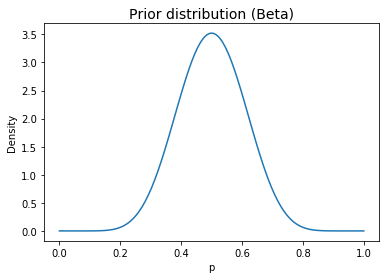

In [2]:
a, b = 10, 10                     # lower values flatten the distribution, higher values make it peak
p = np.linspace(0, 1, 100)        # from 0 to 1 in 100 increments
Pr_prior = beta.pdf(p, a, b)

plt.plot(p, Pr_prior)
plt.xlabel('p')
plt.ylabel('Density')
plt.title('Prior distribution (Beta)', size = 14);

### 2.2. Observations

We consider a biased coin with $p = 0.4$. However, we don't know the value. We must infer it with Bayes' Theorem. We already noticed in exercise 1 that the empirical probability can significantly differ from the true probability when few data samples are available. We will later see how the Posterior evolve as the number of observations increases.

In [3]:
p_true = .4
n_obs = 200
data = binom.rvs(1, p_true, size = n_obs)

### 2.3. Posterior distribution

We follow the rule of conjugates. With the Beta prior distribution the conjugate to the Binomial likelihood distribution, the posterior follows also a Beta distribution. It follows that
$$
P(p|k,n,\alpha,\beta) = \text{Beta}(p|\alpha+k, \beta+(n-k))
$$
The parameters of the posterior Beta distribution combine our _a priori_ assumptions (hyperparameters $\alpha$ and $\beta$) and the observed data, i.e. the number of times we flipped $k$ heads and $n-k$ tails.

In [4]:
# imports for animation
from matplotlib import animation, rc
from IPython.display import HTML

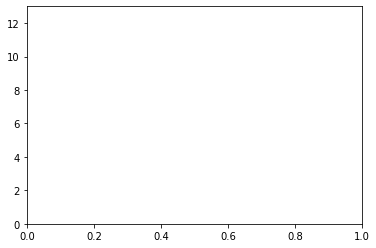

In [5]:
# plot setup
fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 13))
ttl = ax.text(0.7, 0.8, '', transform = ax.transAxes, va='center', size = 10)
line, = ax.plot([], [], lw = 2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [6]:
# animation function. This is called sequentially
def animate(i):
    global a, b
    if i != 0:
        a += data[i-1]        # alpha updating to compute posterior
        b += 1 - data[i-1]    # beta updating to compute posterior

    ttl.set_text("$\\alpha= " + str(a) + ", \\beta=" + str(b) + "$")
    Pr_post = beta.pdf(p, a, b) #p = np.linspace(0, 1, 100)  
    line.set_data(p, Pr_post)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True)

In [7]:
HTML(anim.to_html5_video())

**EXERCISE 2:** Define a new prior assuming no _a priori_ knowledge on the behavior of the coin (i.e. no preference on what values $p$ could take). Note that a uniform distribution can be described by a Beta distribution with $\alpha = \beta = 1$. Plot the new prior.

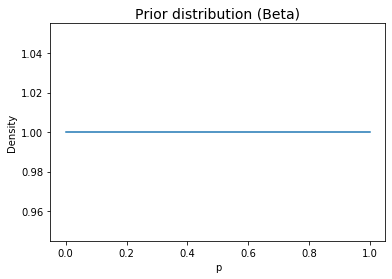

In [8]:
a2 = b2 = 1                  # lower values flatten the distribution, higher values make it peak
p = np.linspace(0, 1, 100)        # from 0 to 1 in 100 increments
Pr_prior = beta.pdf(p, a2, b2)

plt.plot(p, Pr_prior)
plt.xlabel('p')
plt.ylabel('Density')
plt.title('Prior distribution (Beta)', size = 14);

**EXERCISE 3:** Rerun the bayesian inference with this new prior and plot the animation.

In [9]:
# animation function. This is called sequentially
def animate2(i):
    global a2, b2
    if i != 0:
        a2 += data[i-1]        # alpha updating to compute posterior
        b2 += 1 - data[i-1]    # beta updating to compute posterior

    ttl.set_text("$\\alpha= " + str(a2) + ", \\beta=" + str(b2) + "$")
    Pr_post = beta.pdf(p, a2, b2) #p = np.linspace(0, 1, 100)  
    line.set_data(p, Pr_post)
    return (line,)

anim2 = animation.FuncAnimation(fig, animate2, init_func = init, frames = 200, interval = 20, blit = True)

In [10]:
HTML(anim2.to_html5_video())

**EXERCISE 4:** Redo exercises 2-3 but now with $\alpha = 50$ and $\beta = 10$. What can you say about the role of the prior in view of the 3 different ones tested in this notebook?

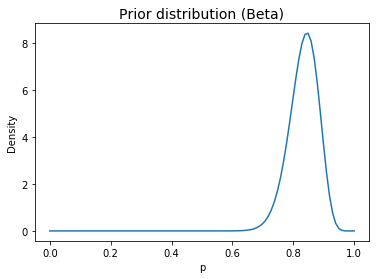

In [11]:
# YOUR CODE HERE (prior)
a3, b3 = 50, 10                     # lower values flatten the distribution, higher values make it peak
p = np.linspace(0, 1, 100)        # from 0 to 1 in 100 increments
Pr_prior = beta.pdf(p, a3, b3)

plt.plot(p, Pr_prior)
plt.xlabel('p')
plt.ylabel('Density')
plt.title('Prior distribution (Beta)', size = 14);

In [12]:
# animation function. This is called sequentially
def animate3(i):
    global a3, b3
    if i != 0:
        a3 += data[i-1]        # alpha updating to compute posterior
        b3 += 1 - data[i-1]    # beta updating to compute posterior

    ttl.set_text("$\\alpha= " + str(a3) + ", \\beta=" + str(b3) + "$")
    Pr_post = beta.pdf(p, a3, b3)
    line.set_data(p, Pr_post)
    return (line,)

anim3 = animation.FuncAnimation(fig, animate3, init_func = init, frames = 200, interval = 20, blit = True)

In [13]:
HTML(anim3.to_html5_video())

**The role of prior:**  
1. It determines the initial "shape" of PDF (probability density function) for looping and computing the posterior  
2. The posterior can be simply calculated by the product of the likelihood distribution and prior distrubution, here for the Beta prior conjugate of Binomial likelihood, we just looping the updated $\alpha=\alpha_p+s, \beta=\beta_p+f$, with s successes and f failures
2. If prior is highly varianced (for example in Excercise 4) or highly biased (for example in Example 2), within limited steps, the posterior may not "converge" to a satisfied result, and it will take more steps for calculation.  
